## Sobreajuste

Les voy a mostrar algo mágico. Y después les voy a contar por qué le puse el título a este documento. 

Déjenme importar primero algunas bibliotecas de manejo de datos y aprendizaje automático (sí, efectivamente: Inteligencia Artificial). Así verán que no hay truco, que lo que hago no es magia, sino simplemente computación y un poco de álgebra.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Por supuesto, voy a utilizar los datos de casos de COVID-19 en Uruguay. No los tengo completos completos, pero gracias a la gente de GUIAD-Covid-19, me puedo acercar. De esos datos, para más magia, voy a usar solamente dos atributos: el día desde el que empezamos a medir, y la cantidad de casos. 

In [16]:
covid=pd.read_csv('https://raw.githubusercontent.com/natydasilva/COVID19-UDELAR/master/Datos/Datos_Nacionales/estadisticasUY.csv?token=ABCA7RFDBSMT4PMGJMNCXQS6RUVRA')
covid

,fecha,dia,cantTest,acumTest,cantTestPositivos,acumTestPositivos,cantCTI,cantCI,fallecidos,recuperados
0,13/03/2020,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,14/03/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,15/03/2020,3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,16/03/2020,4,NaN,NaN,NaN,29.0,NaN,NaN,0,NaN
4,17/03/2020,5,NaN,NaN,21.0,50.0,NaN,NaN,0,NaN
5,18/03/2020,6,NaN,NaN,29.0,79.0,NaN,NaN,0,NaN
6,19/03/2020,7,NaN,NaN,15.0,94.0,NaN,NaN,0,NaN
7,20/03/2020,8,NaN,NaN,16.0,110.0,NaN,NaN,0,NaN
8,21/03/2020,9,NaN,NaN,25.0,135.0,NaN,NaN,0,NaN
9,22/03/2020,10,205.0,1129.0,23.0,158.0,NaN,NaN,0,NaN


In [23]:
data=covid.loc[3:,['dia', 'acumTestPositivos']]
data

,dia,acumTestPositivos
3,4,29.0
4,5,50.0
5,6,79.0
6,7,94.0
7,8,110.0
8,9,135.0
9,10,158.0
10,11,162.0
11,12,189.0
12,13,217.0


Y voy a utilizar una función polinomial de orden 5, para ver si podemos ajustar a los datos y encontrar un patrón. Este procedimiento se llama regresión, y es una de las herramientas de la Inteligencia Artificial. 

Text(0, 0.5, 'casos confirmados')

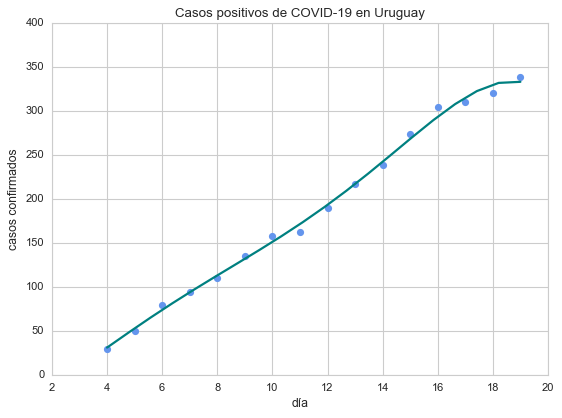

In [62]:
x=data['dia']
x_plot=np.linspace(4,19,20)
y=data['acumTestPositivos']
X=x[:,np.newaxis]
X_plot=x_plot[:,np.newaxis]

plt.scatter(x,y, color='cornflowerblue', linewidth=2,
         label="ground truth")

model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal', linewidth=2,
             label="degree %d" % degree)

plt.title("Casos positivos de COVID-19 en Uruguay")
plt.xlabel("día")
plt.ylabel("casos confirmados")

Por increíble que parezca, hemos encontrado una función que ajusta casi perfectamente a los casos que se han confirmado como positivos en Uruguay. Y ahora, el toque final: utilicemos esta función para predecir cuántos casos habrá en 10 días, de continuar con este ritmo. 

Text(0, 0.5, 'casos confirmados')

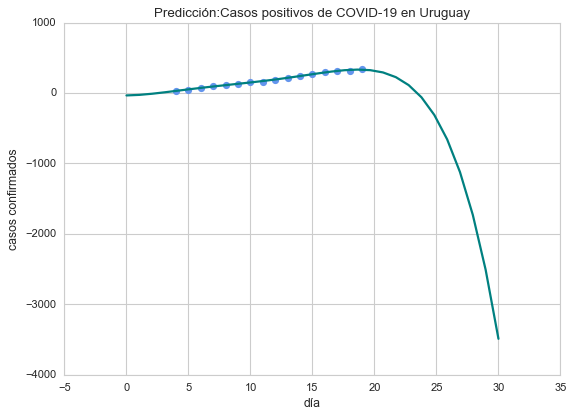

In [63]:
x_plot=x_plot=np.linspace(0,30,30)
plt.scatter(x,y, color='cornflowerblue', linewidth=2,
         label="ground truth")

X_plot=x_plot[:,np.newaxis]

y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal', linewidth=2,
             label="degree %d" % degree)

plt.title("Predicción:Casos positivos de COVID-19 en Uruguay")
plt.xlabel("día")
plt.ylabel("casos confirmados")

Según esta función, para el día 30 tendremos unos... -3500 casos (MENOS 3500 casos)

![ChessUrl](https://66.media.tumblr.com/3fe2325673e35f6d98893a8f10fd5975/tumblr_mx7hq2GDJk1t1oqwjo1_400.gif "surprise")

Bienvenidos al mundo del sobreajuste. **Cuando se tienen pocos datos, es muy sencillo ajustar una función (sobre todo si es compleja) para que pase por todos los puntos que tenemos**. O, como dijo alguna vez John Von Neumann (ese sí, uno de los padres de la computación, ergo de la inteligencia artificial): "Con cuatro parámetros puedo ajustar un elefante, y con cinco puedo hacer que mueva la trompa". El problema es que ese ajuste es inútil para predecir, ya que lo único que está haciendo es memorizar los puntos, sin ser capaz de generalizar.  

**Moraleja: con tan pocos días, y con tantos elementos que modifican los comportamientos (por ejemplo, las medidas tomadas por el gobierno), intentar sacar conclusiones sobre cómo viene el progreso de la epidamia es muy difícil. Predecir es aún más difícil. Y hacerlo sin el conocimiento del dominio que tiene gente que dedica su vida a estudiar epidemias, yo diría que es imposible.**

Les dejo un link creo que muy interesante publicado por la Fundación Sadosky, titulado [Inteligencia Artificial en épocas de pandemia](http://www.fundacionsadosky.org.ar/inteligencia-artificial-en-epocas-de-pandemia/), una nota precautoria sobre el uso de técnicas de análisis de datos a partir de datos escasos, incompletos o de un dominio que no conocemos bien.


PD: La regresión la inventó Legendre en 1805. 

PD2: Quedate en casa.